# SE4050 - Lab 6 


 We highly recommend you to run this notebook, so you can get familiar with the basic concepts of graphs and networks.

In this Colab, we will introduce a graph related package, [NetworkX](https://networkx.org/documentation/stable/).

NetworkX is one of the most frequently used Python packages to create, manipulate, and mine graphs.

Main parts of this tutorial are adapted from https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6

Please make a copy before you proceed.

In [1]:
# Upgrade packages
!pip install --upgrade scipy networkx

In [2]:
# Import the NetworkX package
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Graph
NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [3]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Node

Nodes (with attributes) can be easily added to NetworkX graphs.

In [4]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [5]:
G.nodes(data=True)

NodeDataView({0: {'feature': 5, 'label': 0}})

In [6]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## Edge

Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [7]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [8]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## Visualization

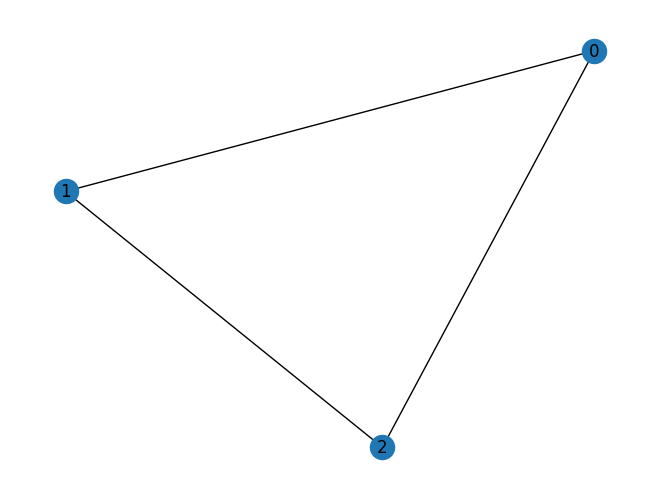

In [9]:
# Draw the graph
nx.draw(G, with_labels = True)

## Node Degree and Neighbor

In [10]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## Random Graph creation and analysis

In [11]:
# creation of a random network with N nodes and E edges - this a erdos-renyi graph
def create(n,m):
    G = nx.gnm_random_graph(n, m, seed = random_state)
    return G

In [12]:
def degree_analysis(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(2, 4)


    ax1 = fig.add_subplot(axgrid[:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    plt.show()

In [13]:
random_state = np.random.RandomState(42)
N=200 #number of nodes
E=2*N #number of edges
G=create(N,E)

In [14]:
print(G.edges(nbunch=4))
print(G.adj)
print(G.edges)
print(type(G))
print(len(G.edges))

[(4, 122), (4, 141), (4, 102), (4, 28), (4, 118)]
{0: {130: {}, 33: {}, 68: {}, 166: {}, 158: {}}, 1: {52: {}, 131: {}, 129: {}, 112: {}, 127: {}}, 2: {115: {}, 92: {}, 117: {}}, 3: {105: {}, 146: {}, 15: {}}, 4: {122: {}, 141: {}, 102: {}, 28: {}, 118: {}}, 5: {98: {}, 195: {}}, 6: {98: {}, 173: {}}, 7: {171: {}, 26: {}, 64: {}, 52: {}, 92: {}, 121: {}}, 8: {13: {}, 70: {}, 98: {}, 198: {}, 73: {}}, 9: {22: {}, 55: {}}, 10: {184: {}, 176: {}}, 11: {161: {}, 51: {}, 100: {}, 140: {}, 36: {}, 73: {}}, 12: {159: {}, 151: {}, 143: {}, 22: {}}, 13: {8: {}, 94: {}, 142: {}}, 14: {92: {}, 187: {}, 47: {}, 44: {}, 136: {}, 53: {}}, 15: {128: {}, 3: {}, 199: {}}, 16: {48: {}, 103: {}, 29: {}}, 17: {131: {}, 127: {}}, 18: {91: {}, 186: {}, 188: {}, 89: {}}, 19: {172: {}, 146: {}}, 20: {188: {}, 160: {}, 134: {}, 47: {}, 26: {}, 163: {}}, 21: {57: {}, 157: {}, 92: {}}, 22: {61: {}, 9: {}, 12: {}}, 23: {153: {}, 37: {}, 92: {}, 113: {}, 79: {}}, 24: {53: {}, 179: {}}, 25: {98: {}, 84: {}}, 26: {1

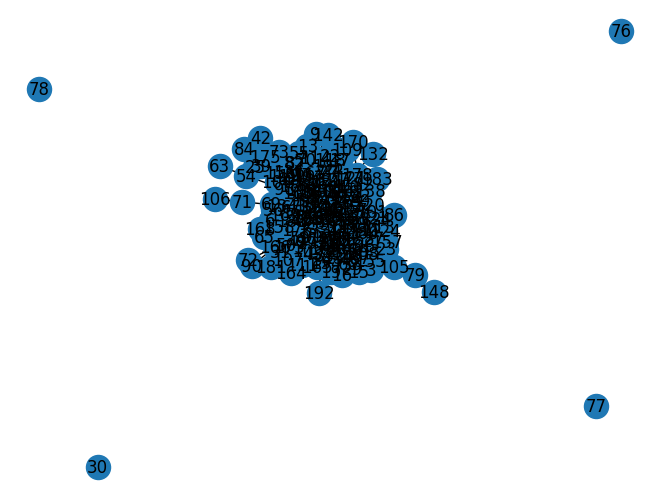

In [15]:
pos_cons = nx.spring_layout(G,seed = random_state)
nx.draw(G, pos=pos_cons,labels ={node:node for node in G.nodes()}) #spring_layout , spectral_layout
plt.draw()


In [16]:
# Get the adjacency matrix
A = nx.adjacency_matrix(G).toarray()
print("Adjacency Matrix:")
print(A)



# Get the degree matrix
import numpy as np

# Calculate the degree matrix
degree_sequence = [d for n, d in G.degree()]
degree_matrix = np.diag(degree_sequence)

# Print the degree matrix
print("Degree Matrix:")
print(degree_matrix)



# Get the Laplacian matrix
# Calculate the Laplacian matrix
laplacian_matrix = nx.laplacian_matrix(G)

# Convert the Laplacian matrix to a dense NumPy array
L = laplacian_matrix.toarray()

# Print the Laplacian matrix
print("Laplacian Matrix:")
print(L)

Adjacency Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Degree Matrix:
[[5 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 5]]
Laplacian Matrix:
[[5 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 5]]


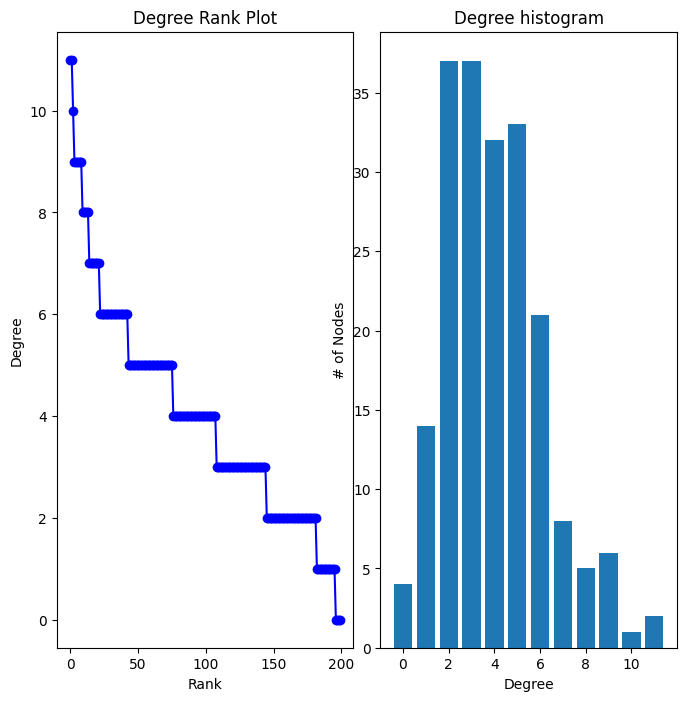

In [17]:
degree_analysis(G)

In [23]:
# calculate the graph density for the above created random graph

# Calculate the graph density
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = num_edges / (num_nodes * (num_nodes - 1))

# Print the graph density
print("Graph Density:", density)





Graph Density: 0.010050251256281407


Graph Density for N=20: 0.21052631578947367


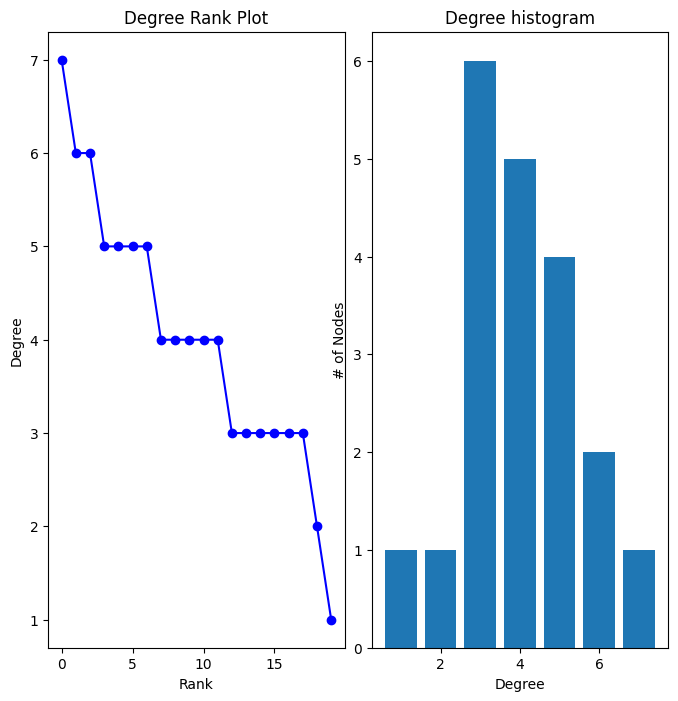

Graph Density for N=50: 0.08163265306122448


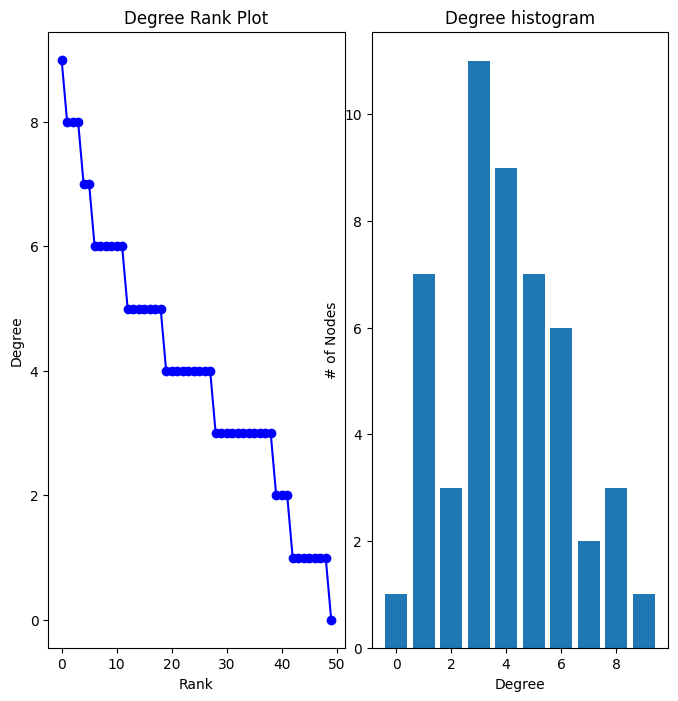

Graph Density for N=100: 0.04040404040404041


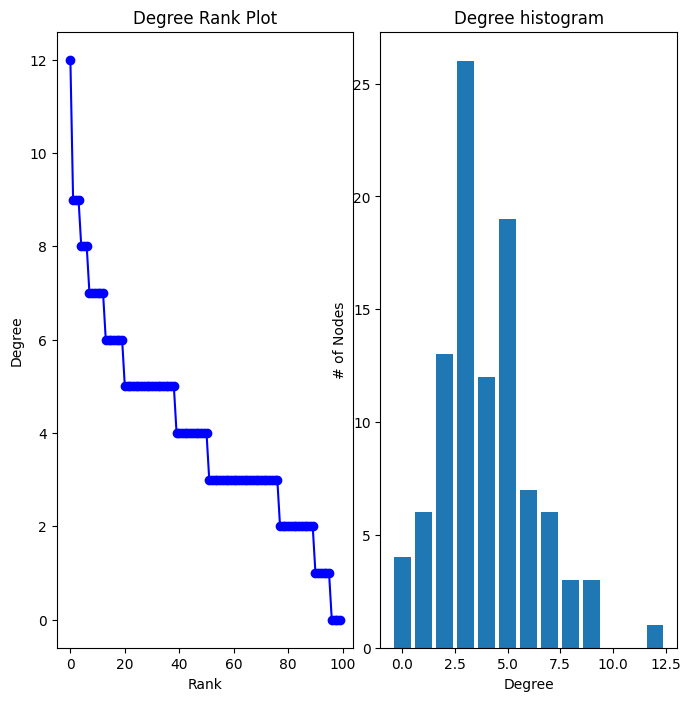

Graph Density for N=150: 0.026845637583892617


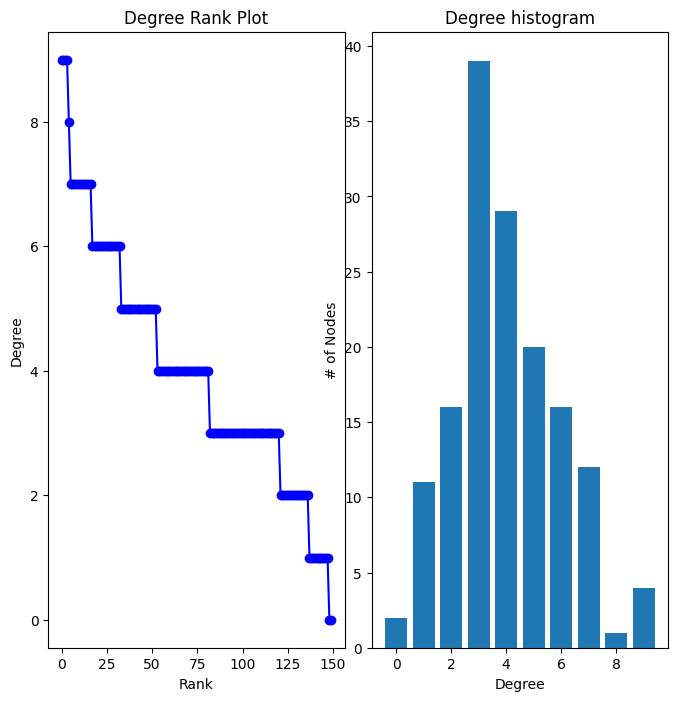

Graph Density for N=200: 0.020100502512562814


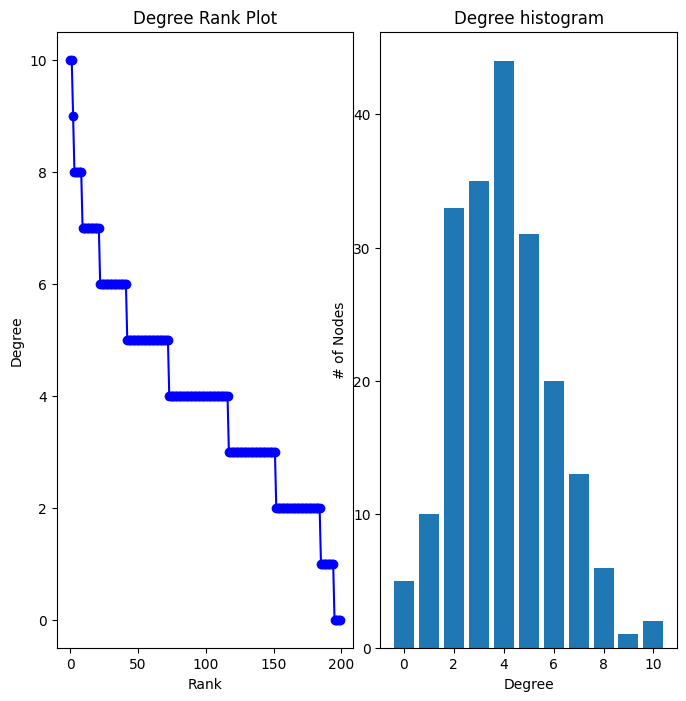

In [24]:
# Function to create a random graph with N nodes and E edges
def create(n, m, random_state):
    G = nx.gnm_random_graph(n, m, seed=random_state)
    return G

# Function to analyze the degree distribution of a graph
def degree_analysis(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(2, 4)

    # Degree Rank Plot
    ax1 = fig.add_subplot(axgrid[:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    # Degree Histogram
    ax2 = fig.add_subplot(axgrid[:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    plt.show()

# Function to calculate the graph density
def calculate_graph_density(G):
    return 2 * G.number_of_edges() / (G.number_of_nodes() * (G.number_of_nodes() - 1))

# Set the random seed
random_state = np.random.RandomState(42)

# Loop through different values of N (number of nodes) and observe density and degree distribution
for N in [20, 50, 100, 150, 200]:
    E = 2 * N  # Number of edges
    G = create(N, E, random_state)

    # Calculate and print graph density
    density = calculate_graph_density(G)
    print(f"Graph Density for N={N}: {density}")

    # Analyze and plot degree distribution
    degree_analysis(G)
